In [1]:
import numpy as np
import nengo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nni
import pickle
import json
from model import Inputs, build_network, run_once

In [3]:
def run_all_trials(args, deltaPs=[0.1, 0.2, 0.4], nTr=None, name="default"):
    # each participant has a participant ID (a long string) and an associated "pid" (integer) in the database
    # load this data to compute the loss between simulated and model behavior

    pid = args['pid']  # tria.suggest_int('pid', 1)
    T = args['T']
    m = args['m']
    tau = args['tau']
    delta = args['delta']
    seed = args['seed']  # pid
    
    with open('data/pids.pkl', 'rb') as f:
        pids = pickle.load(f)
    participant_ID = pids[pid]

    dfs = []
    columns = ('agent', 'dP', 'trial', 'cues', 'correct')
    for dP in deltaPs:
        empirical = pd.read_pickle("data/empirical.pkl").query("maxSamples==12 & delta==@dP & participant_id==@participant_ID")
        empirical_cues = empirical['cues'].to_numpy()
        empirical_accuracy = empirical['correct'].to_numpy()
        nTrials = empirical.shape[0] if not nTr else nTr
        
        simulated_cues = []
        simulated_accuracy = []
        inputs = Inputs(deltaP=dP, maxCues=12, seed=pid, empirical=empirical)
        net = build_network(inputs, seed=seed, T=T, m=m, tau=tau, delta=delta)
        for trial in range(nTrials):
            print(f"deltaP={dP}, trial={trial}")
            net.inputs.set_AB(trial=trial)
            is_correct, cues_sampled = run_once(net)
            dfs.append(pd.DataFrame([['model', dP, trial, cues_sampled, 1.0*is_correct,]], columns=columns))
            dfs.append(pd.DataFrame([['human', dP, trial, empirical_cues[trial], 1.0*empirical_accuracy[trial]]], columns=columns))
    data = pd.concat(dfs, ignore_index=True)
    data.to_pickle(f"data/{name}_results.pkl")

## Rerun all trials for the fast individual

In [22]:
args_fast = {'pid': 1, 'delta': 0.1, 'm': 0.1, 'T': 0.48, 'tau': 0.1}
run_all_trials(args_fast)

deltaP=0.1, trial=0
deltaP=0.1, trial=1
deltaP=0.1, trial=2
deltaP=0.1, trial=3
deltaP=0.1, trial=4
deltaP=0.1, trial=5
deltaP=0.1, trial=6
deltaP=0.1, trial=7
deltaP=0.1, trial=8
deltaP=0.1, trial=9
deltaP=0.1, trial=10
deltaP=0.1, trial=11
deltaP=0.1, trial=12
deltaP=0.1, trial=13
deltaP=0.1, trial=14
deltaP=0.1, trial=15
deltaP=0.1, trial=16
deltaP=0.1, trial=17
deltaP=0.1, trial=18
deltaP=0.1, trial=19
deltaP=0.1, trial=20
deltaP=0.1, trial=21
deltaP=0.1, trial=22
deltaP=0.1, trial=23
deltaP=0.1, trial=24
deltaP=0.1, trial=25
deltaP=0.1, trial=26
deltaP=0.1, trial=27
deltaP=0.1, trial=28
deltaP=0.1, trial=29
deltaP=0.1, trial=30
deltaP=0.1, trial=31
deltaP=0.1, trial=32
deltaP=0.1, trial=33
deltaP=0.1, trial=34
deltaP=0.1, trial=35
deltaP=0.1, trial=36
deltaP=0.1, trial=37
deltaP=0.1, trial=38
deltaP=0.1, trial=39
deltaP=0.1, trial=40
deltaP=0.1, trial=41
deltaP=0.1, trial=42
deltaP=0.1, trial=43
deltaP=0.1, trial=44
deltaP=0.1, trial=45
deltaP=0.1, trial=46
deltaP=0.1, trial=47
de

In [3]:
args_fast2 = {'pid': 1, 'delta': 0.0, 'm': 0.07, 'T': 0.76, 'tau': 0.19}
run_all_trials(args_fast2)

deltaP=0.1, trial=0
deltaP=0.1, trial=1
deltaP=0.1, trial=2
deltaP=0.1, trial=3
deltaP=0.1, trial=4
deltaP=0.1, trial=5
deltaP=0.1, trial=6
deltaP=0.1, trial=7
deltaP=0.1, trial=8
deltaP=0.1, trial=9
deltaP=0.1, trial=10
deltaP=0.1, trial=11
deltaP=0.1, trial=12
deltaP=0.1, trial=13
deltaP=0.1, trial=14
deltaP=0.1, trial=15
deltaP=0.1, trial=16
deltaP=0.1, trial=17
deltaP=0.1, trial=18
deltaP=0.1, trial=19
deltaP=0.1, trial=20
deltaP=0.1, trial=21
deltaP=0.1, trial=22
deltaP=0.1, trial=23
deltaP=0.1, trial=24
deltaP=0.1, trial=25
deltaP=0.1, trial=26
deltaP=0.1, trial=27
deltaP=0.1, trial=28
deltaP=0.1, trial=29
deltaP=0.1, trial=30
deltaP=0.1, trial=31
deltaP=0.1, trial=32
deltaP=0.1, trial=33
deltaP=0.1, trial=34
deltaP=0.1, trial=35
deltaP=0.1, trial=36
deltaP=0.1, trial=37
deltaP=0.1, trial=38
deltaP=0.1, trial=39
deltaP=0.1, trial=40
deltaP=0.1, trial=41
deltaP=0.1, trial=42
deltaP=0.1, trial=43
deltaP=0.1, trial=44
deltaP=0.1, trial=45
deltaP=0.1, trial=46
deltaP=0.1, trial=47
de

In [4]:
# optimize T and m with loss squared
args_fast = {'pid': 1, 'delta': 0.0, 'm': 0.26, 'T': 0.23, 'tau': 0.0}
run_all_trials(args_fast)

deltaP=0.1, trial=0
deltaP=0.1, trial=1
deltaP=0.1, trial=2
deltaP=0.1, trial=3
deltaP=0.1, trial=4
deltaP=0.1, trial=5
deltaP=0.1, trial=6
deltaP=0.1, trial=7
deltaP=0.1, trial=8
deltaP=0.1, trial=9
deltaP=0.1, trial=10
deltaP=0.1, trial=11
deltaP=0.1, trial=12
deltaP=0.1, trial=13
deltaP=0.1, trial=14
deltaP=0.1, trial=15
deltaP=0.1, trial=16
deltaP=0.1, trial=17
deltaP=0.1, trial=18
deltaP=0.1, trial=19
deltaP=0.1, trial=20
deltaP=0.1, trial=21
deltaP=0.1, trial=22
deltaP=0.1, trial=23
deltaP=0.1, trial=24
deltaP=0.1, trial=25
deltaP=0.1, trial=26
deltaP=0.1, trial=27
deltaP=0.1, trial=28
deltaP=0.1, trial=29
deltaP=0.1, trial=30
deltaP=0.1, trial=31
deltaP=0.1, trial=32
deltaP=0.1, trial=33
deltaP=0.1, trial=34
deltaP=0.1, trial=35
deltaP=0.1, trial=36
deltaP=0.1, trial=37
deltaP=0.1, trial=38
deltaP=0.1, trial=39
deltaP=0.1, trial=40
deltaP=0.1, trial=41
deltaP=0.1, trial=42
deltaP=0.1, trial=43
deltaP=0.1, trial=44
deltaP=0.1, trial=45
deltaP=0.1, trial=46
deltaP=0.1, trial=47
de

In [8]:
# optimize tmTd with loss squared
args_fast = {'pid': 1, 'delta': 0.42, 'm': 0.42, 'T': 0.19, 'tau': 0.13}
run_all_trials(args_fast, name='tmTd_fast')

deltaP=0.1, trial=0
deltaP=0.1, trial=1
deltaP=0.1, trial=2
deltaP=0.1, trial=3
deltaP=0.1, trial=4
deltaP=0.1, trial=5
deltaP=0.1, trial=6
deltaP=0.1, trial=7
deltaP=0.1, trial=8
deltaP=0.1, trial=9
deltaP=0.1, trial=10
deltaP=0.1, trial=11
deltaP=0.1, trial=12
deltaP=0.1, trial=13
deltaP=0.1, trial=14
deltaP=0.1, trial=15
deltaP=0.1, trial=16
deltaP=0.1, trial=17
deltaP=0.1, trial=18
deltaP=0.1, trial=19
deltaP=0.1, trial=20
deltaP=0.1, trial=21
deltaP=0.1, trial=22
deltaP=0.1, trial=23
deltaP=0.1, trial=24
deltaP=0.1, trial=25
deltaP=0.1, trial=26
deltaP=0.1, trial=27
deltaP=0.1, trial=28
deltaP=0.1, trial=29
deltaP=0.1, trial=30
deltaP=0.1, trial=31
deltaP=0.1, trial=32
deltaP=0.1, trial=33
deltaP=0.1, trial=34
deltaP=0.1, trial=35
deltaP=0.1, trial=36
deltaP=0.1, trial=37
deltaP=0.1, trial=38
deltaP=0.1, trial=39
deltaP=0.1, trial=40
deltaP=0.1, trial=41
deltaP=0.1, trial=42
deltaP=0.1, trial=43
deltaP=0.1, trial=44
deltaP=0.1, trial=45
deltaP=0.1, trial=46
deltaP=0.1, trial=47
de

In [4]:
args_fast = { 'delta': 0.26, 'm': 0.04, 'seed': 677, 'T': 0.88, 'tau': 0.18}
run_all_trials(args_fast, name='tmTds_fast')

deltaP=0.1, trial=0
deltaP=0.1, trial=1
deltaP=0.1, trial=2
deltaP=0.1, trial=3
deltaP=0.1, trial=4
deltaP=0.1, trial=5
deltaP=0.1, trial=6
deltaP=0.1, trial=7
deltaP=0.1, trial=8
deltaP=0.1, trial=9
deltaP=0.1, trial=10
deltaP=0.1, trial=11
deltaP=0.1, trial=12
deltaP=0.1, trial=13
deltaP=0.1, trial=14
deltaP=0.1, trial=15
deltaP=0.1, trial=16
deltaP=0.1, trial=17
deltaP=0.1, trial=18
deltaP=0.1, trial=19
deltaP=0.1, trial=20
deltaP=0.1, trial=21
deltaP=0.1, trial=22
deltaP=0.1, trial=23
deltaP=0.1, trial=24
deltaP=0.1, trial=25
deltaP=0.1, trial=26
deltaP=0.1, trial=27
deltaP=0.1, trial=28
deltaP=0.1, trial=29
deltaP=0.1, trial=30
deltaP=0.1, trial=31
deltaP=0.1, trial=32
deltaP=0.1, trial=33
deltaP=0.1, trial=34
deltaP=0.1, trial=35
deltaP=0.1, trial=36
deltaP=0.1, trial=37
deltaP=0.1, trial=38
deltaP=0.1, trial=39
deltaP=0.1, trial=40
deltaP=0.1, trial=41
deltaP=0.1, trial=42
deltaP=0.1, trial=43
deltaP=0.1, trial=44
deltaP=0.1, trial=45
deltaP=0.1, trial=46
deltaP=0.1, trial=47
de

In [4]:
args = {'pid': 1, 'delta': 0.08, 'm': 0.02, 'seed': 760, 'T': 0.89, 'tau': 0.25}
run_all_trials(args, name='tmTds_fast_abs')

deltaP=0.1, trial=0
deltaP=0.1, trial=1
deltaP=0.1, trial=2
deltaP=0.1, trial=3
deltaP=0.1, trial=4
deltaP=0.1, trial=5
deltaP=0.1, trial=6
deltaP=0.1, trial=7
deltaP=0.1, trial=8
deltaP=0.1, trial=9
deltaP=0.1, trial=10
deltaP=0.1, trial=11
deltaP=0.1, trial=12
deltaP=0.1, trial=13
deltaP=0.1, trial=14
deltaP=0.1, trial=15
deltaP=0.1, trial=16
deltaP=0.1, trial=17
deltaP=0.1, trial=18
deltaP=0.1, trial=19
deltaP=0.1, trial=20
deltaP=0.1, trial=21
deltaP=0.1, trial=22
deltaP=0.1, trial=23
deltaP=0.1, trial=24
deltaP=0.1, trial=25
deltaP=0.1, trial=26
deltaP=0.1, trial=27
deltaP=0.1, trial=28
deltaP=0.1, trial=29
deltaP=0.1, trial=30
deltaP=0.1, trial=31
deltaP=0.1, trial=32
deltaP=0.1, trial=33
deltaP=0.1, trial=34
deltaP=0.1, trial=35
deltaP=0.1, trial=36
deltaP=0.1, trial=37
deltaP=0.1, trial=38
deltaP=0.1, trial=39
deltaP=0.1, trial=40
deltaP=0.1, trial=41
deltaP=0.1, trial=42
deltaP=0.1, trial=43
deltaP=0.1, trial=44
deltaP=0.1, trial=45
deltaP=0.1, trial=46
deltaP=0.1, trial=47
de

## Run all trials for slow individual

In [4]:
args_slow = {'pid': 38, 'delta': 0.5, 'm': 0.18, 'T': 0.80, 'tau': 0.05}
run_all_trials(args_slow)

deltaP=0.1, trial=0
deltaP=0.1, trial=1
deltaP=0.1, trial=2
deltaP=0.1, trial=3
deltaP=0.1, trial=4
deltaP=0.1, trial=5
deltaP=0.1, trial=6
deltaP=0.1, trial=7
deltaP=0.1, trial=8
deltaP=0.1, trial=9
deltaP=0.1, trial=10
deltaP=0.1, trial=11
deltaP=0.1, trial=12
deltaP=0.1, trial=13
deltaP=0.1, trial=14
deltaP=0.1, trial=15
deltaP=0.1, trial=16
deltaP=0.1, trial=17
deltaP=0.1, trial=18
deltaP=0.1, trial=19
deltaP=0.1, trial=20
deltaP=0.1, trial=21
deltaP=0.1, trial=22
deltaP=0.1, trial=23
deltaP=0.1, trial=24
deltaP=0.2, trial=0
deltaP=0.2, trial=1
deltaP=0.2, trial=2
deltaP=0.2, trial=3
deltaP=0.2, trial=4
deltaP=0.2, trial=5
deltaP=0.2, trial=6
deltaP=0.2, trial=7
deltaP=0.2, trial=8
deltaP=0.2, trial=9
deltaP=0.2, trial=10
deltaP=0.2, trial=11
deltaP=0.2, trial=12
deltaP=0.2, trial=13
deltaP=0.2, trial=14
deltaP=0.2, trial=15
deltaP=0.2, trial=16
deltaP=0.2, trial=17
deltaP=0.2, trial=18
deltaP=0.2, trial=19
deltaP=0.2, trial=20
deltaP=0.2, trial=21
deltaP=0.2, trial=22
deltaP=0.2, 

## Plot histograms

In [6]:
def plot(name_fast, name_slow, name_output="individual"):
    palette = sns.color_palette("colorblind")
    sns.set_palette(palette)
    sns.set(context='paper', style='ticks', rc={'font.size':12, 'mathtext.fontset': 'cm'})  # font='CMU Serif',

    fast_data = pd.read_pickle(f"data/{name_fast}_results.pkl")
    slow_data = pd.read_pickle(f"data/{name_slow}_results.pkl")

    fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=((7.07, 3)))
    sns.histplot(data=fast_data.query("dP==0.4"), x='cues', hue='agent', bins=np.arange(0, 27, 3), hue_order=["human", "model"],
        palette=palette[:2], ax=axes[0][0], stat='percent', multiple='layer', element='step', linewidth=1)
    sns.histplot(data=fast_data.query("dP==0.2"), x='cues', hue='agent', bins=np.arange(0, 27, 3), hue_order=["human", "model"],
        palette=palette[:2], ax=axes[0][1], stat='percent', multiple='layer', element='step', linewidth=1)
    sns.histplot(data=fast_data.query("dP==0.1"), x='cues', hue='agent', bins=np.arange(0, 27, 3), hue_order=["human", "model"],
        palette=palette[:2], ax=axes[0][2], stat='percent', multiple='layer', element='step', linewidth=1)
    axes[0][0].get_legend().remove()
    axes[0][1].get_legend().remove()
    axes[0][2].get_legend().remove()
    easy_human = int(100*fast_data.query("dP==0.4 & agent=='human'")['correct'].mean())
    moderate_human = int(100*fast_data.query("dP==0.2 & agent=='human'")['correct'].mean())
    hard_human = int(100*fast_data.query("dP==0.1 & agent=='human'")['correct'].mean())
    easy_model = int(100*fast_data.query("dP==0.4 & agent=='model'")['correct'].mean())
    moderate_model = int(100*fast_data.query("dP==0.2 & agent=='model'")['correct'].mean())
    hard_model = int(100*fast_data.query("dP==0.1 & agent=='model'")['correct'].mean())
    sns.lineplot(x=[0],y=[0], color=palette[0], label=f"{easy_human}%", ax=axes[0][0])
    sns.lineplot(x=[0],y=[0], color=palette[0], label=f"{moderate_human}%", ax=axes[0][1])
    sns.lineplot(x=[0],y=[0], color=palette[0], label=f"{hard_human}%", ax=axes[0][2])
    sns.lineplot(x=[0],y=[0], color=palette[1], label=f"{easy_model}%", ax=axes[0][0])
    sns.lineplot(x=[0],y=[0], color=palette[1], label=f"{moderate_model}%", ax=axes[0][1])
    sns.lineplot(x=[0],y=[0], color=palette[1], label=f"{hard_model}%", ax=axes[0][2])
    axes[0][0].set(xlabel=None, title="Easy", ylabel="Frequency (%)\nFast\nIndividual", yticks=((0, 5, 10, 15, 20, 25)))
    axes[0][1].set(xlabel=None, title="Moderate")
    axes[0][2].set(xlabel=None, title="Hard")

    sns.histplot(data=slow_data.query("dP==0.4"), x='cues', hue='agent', bins=np.arange(0, 27, 3), hue_order=["human", "model"],
        palette=palette[:2], ax=axes[1][0], stat='percent', multiple='layer', element='step', linewidth=1)
    sns.histplot(data=slow_data.query("dP==0.2"), x='cues', hue='agent', bins=np.arange(0, 27, 3), hue_order=["human", "model"],
        palette=palette[:2], ax=axes[1][1], stat='percent', multiple='layer', element='step', linewidth=1)
    sns.histplot(data=slow_data.query("dP==0.1"), x='cues', hue='agent', bins=np.arange(0, 27, 3), hue_order=["human", "model"],
        palette=palette[:2], ax=axes[1][2], stat='percent', multiple='layer', element='step', linewidth=1)
    axes[1][0].get_legend().remove()
    axes[1][1].get_legend().remove()
    axes[1][2].get_legend().remove()
    easy_human = int(100*slow_data.query("dP==0.4 & agent=='human'")['correct'].mean())
    moderate_human = int(100*slow_data.query("dP==0.2 & agent=='human'")['correct'].mean())
    hard_human = int(100*slow_data.query("dP==0.1 & agent=='human'")['correct'].mean())
    easy_model = int(100*slow_data.query("dP==0.4 & agent=='model'")['correct'].mean())
    moderate_model = int(100*slow_data.query("dP==0.2 & agent=='model'")['correct'].mean())
    hard_model = int(100*slow_data.query("dP==0.1 & agent=='model'")['correct'].mean())
    sns.lineplot(x=[0],y=[0], color=palette[0], label=f"{easy_human}%", ax=axes[1][0])
    sns.lineplot(x=[0],y=[0], color=palette[0], label=f"{moderate_human}%", ax=axes[1][1])
    sns.lineplot(x=[0],y=[0], color=palette[0], label=f"Human ({hard_human}% correct)", ax=axes[1][2])
    sns.lineplot(x=[0],y=[0], color=palette[1], label=f"{easy_model}%", ax=axes[1][0])
    sns.lineplot(x=[0],y=[0], color=palette[1], label=f"{moderate_model}%", ax=axes[1][1])
    sns.lineplot(x=[0],y=[0], color=palette[1], label=f"Model ({hard_model}% correct)", ax=axes[1][2])
    axes[1][0].set(xlabel='Cues Sampled', xticks=np.arange(0, 27, 3), xlim=((0, 24)), ylabel='Frequency (%)\nSlow\nIndividual')
    axes[1][1].set(xlabel='Cues Sampled', xticks=np.arange(0, 27, 3), xlim=((0, 24)))
    axes[1][2].set(xlabel='Cues Sampled', xticks=np.arange(0, 27, 3), xlim=((0, 24)))
    plt.tight_layout()

    fig.savefig(f"plots/{name_output}.svg")
    fig.savefig(f"plots/{name_output}.png", dpi=600)

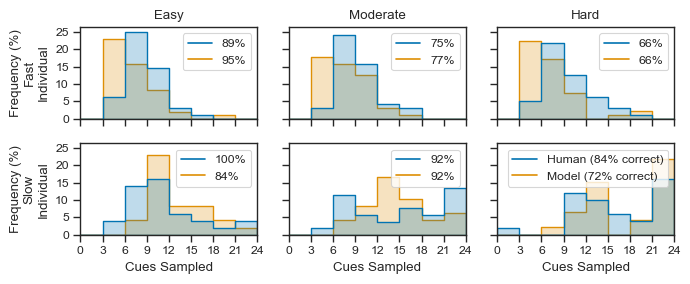

In [27]:
plot("default", "38")

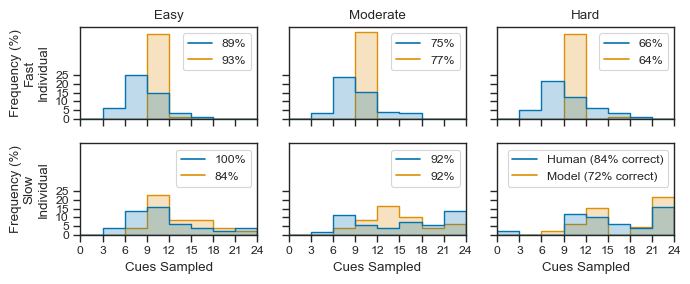

In [7]:
plot("tmTds_fast", "38", "tmTDs_fast_squared")

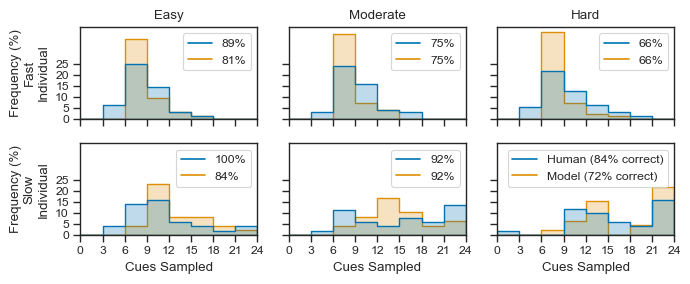

In [7]:
plot("tmTds_fast_abs", "38", "tmTDs_fast_abs")

In [11]:
fast_data =
print(fast_data)

[ 9 10 11 10 10  9 10 10  9 10 15 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10  9 10 10  9 10 10 10 10 10  9 10  9  9 10 10  9  9 10 10 10 10
 10 10 10 11 10 10 10 10  9 10  9  9 10 10  9 10 10 10 10  9 10 10  9 10
 10 10 10 10 10 10  9  9  9 10  9  9 10  9  9 10 10 10 11 10 10  9 10 10
  9 11  9  9 10 10  9 10  9 10 10 10  9 10  9 10  9 10 10 10 10  9 10 10
  9 14 10 10 10  9 11 10 10 10 10  9  9 11 10 10 10  9  9 10 10 10  9 10]


In [18]:
pid = 1
with open('data/pids.pkl', 'rb') as f:
    pids = pickle.load(f)
participant_ID = pids[pid]
empirical = pd.read_pickle("data/empirical.pkl").query("maxSamples==12 & delta==0.4 & participant_id==@participant_ID")['cues'].to_numpy()
sim = pd.read_pickle(f"data/tmTds_fast_results.pkl").query("agent=='model'")['cues'].to_numpy()
nTrials = empirical.shape[0]
total_loss = 0
for trial in range(nTrials):
    loss = np.square(sim[trial] - empirical[trial])
    total_loss += loss
print(total_loss)

462
